In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import plotly.express as px

In [25]:
data = pd.read_csv('old_cars.csv')
data.head()

,Car,MPG,Displacement,Horsepower,Weight,Model,Origin
0,AMC Ambassador Brougham,13.0,360.0,175,3821,73,US
1,AMC Ambassador DPL,15.0,390.0,190,3850,70,US
2,AMC Ambassador SST,17.0,304.0,150,3672,72,US
3,AMC Concord,19.4,232.0,90,3210,78,US
4,AMC Concord,24.3,151.0,90,3003,80,US


In [20]:
df = pd.DataFrame(data)


In [21]:
mileage_data = df['MPG']
models = df['Model']
models
origin = df['Origin']
print(origin)

0          US
1          US
2          US
3          US
4          US
        ...  
393    Europe
394    Europe
395    Europe
396    Europe
397    Europe
Name: Origin, Length: 398, dtype: object


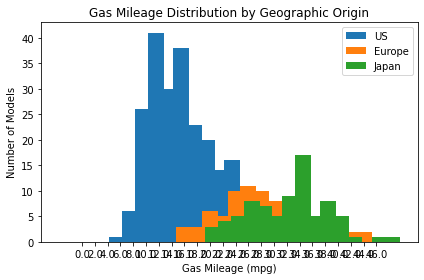

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data from CSV file
data = pd.read_csv("old_cars.csv")

# Get unique origins
origins = data["Origin"].unique()

# Discretize mileage values into 2 mpg increments
mileage_bins = np.arange(0, data["MPG"].max() + 2, 2)

# Initialize counts for each origin and bin
origin_counts = {origin: np.zeros(len(mileage_bins) - 1) for origin in origins}

# Aggregate data into bins and origins
for index, row in data.iterrows():
    bin_index = np.digitize([row["MPG"]], mileage_bins)[0] - 1
    origin_counts[row["Origin"]][bin_index] += 1

# Create the grouped bar chart
bar_width =5
x_ticks = np.arange(len(mileage_bins) - 1) * (len(origins) + 1)

for i, origin in enumerate(origins):
    plt.bar(x_ticks + i * bar_width, origin_counts[origin], width=bar_width, label=origin)

# Add labels, title, legend, etc.
plt.xlabel("Gas Mileage (mpg)")
plt.ylabel("Number of Models")
plt.title("Gas Mileage Distribution by Geographic Origin")
plt.legend()
plt.xticks(x_ticks + bar_width * (len(origins) - 1) / 2, mileage_bins[:-1])

# Show the chart
plt.tight_layout()
plt.show()


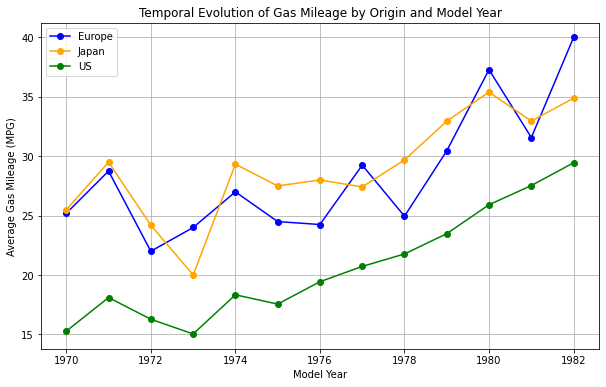

In [82]:
avg_mileage_data = data.groupby(['Origin', 'Model'])['MPG'].mean().reset_index()

# Pivot the data to have origins as columns and years as indices
pivot_data = avg_mileage_data.pivot(index='Model', columns='Origin', values='MPG')

# Plotting
plt.figure(figsize=(10, 6))

# Assigning colors for each origin
colors = ['blue', 'orange', 'green']
origins = pivot_data.columns

# Plotting each origin's curve
for i, origin in enumerate(origins):
    plt.plot(pivot_data.index, pivot_data[origin], marker='o', color=colors[i], label=origin)

plt.title('Temporal Evolution of Gas Mileage by Origin and Model Year')
plt.xlabel('Model Year')
plt.ylabel('Average Gas Mileage (MPG)')
plt.legend()
plt.grid(True)
plt.show()


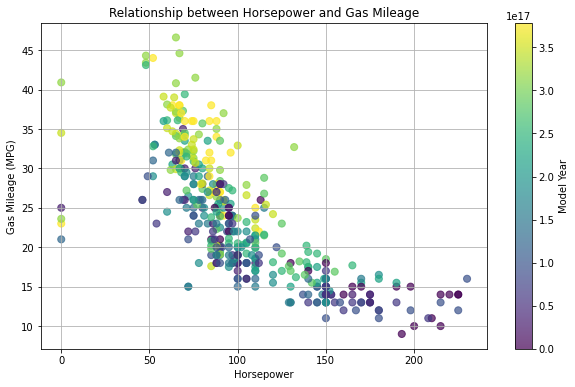

In [83]:
plt.figure(figsize=(10, 6))

# Extracting data
horsepower = data['Horsepower']
mpg = data['MPG']
model_year = data['Model']

# Creating a scatter plot with color coding by year
plt.scatter(horsepower, mpg, c=model_year, cmap='viridis', s=50, alpha=0.7)

# Adding color bar
color_bar = plt.colorbar()
color_bar.set_label('Model Year')

plt.title('Relationship between Horsepower and Gas Mileage')
plt.xlabel('Horsepower')
plt.ylabel('Gas Mileage (MPG)')
plt.grid(True)
plt.show()


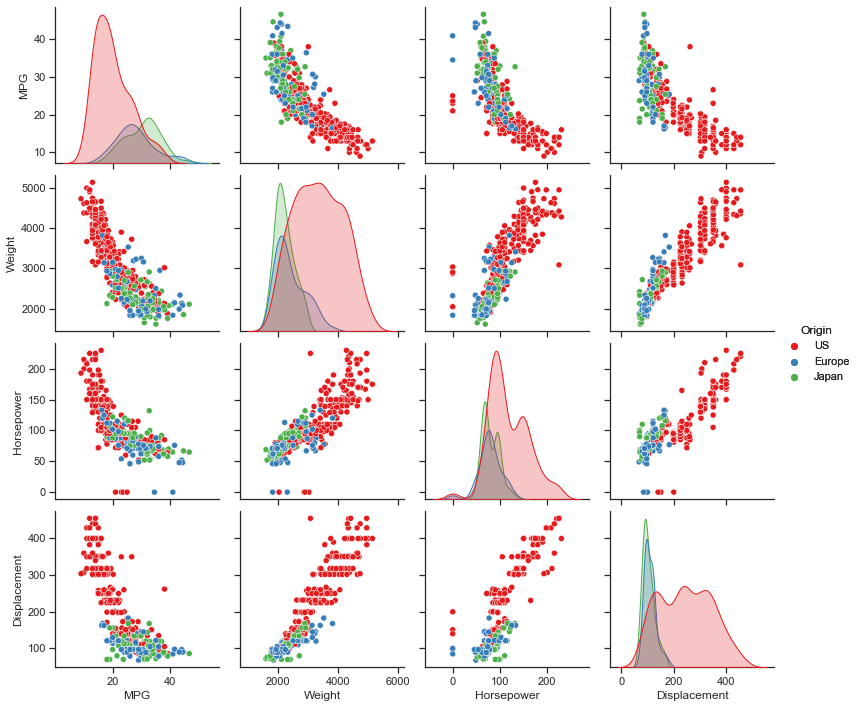

In [87]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have your data loaded into a DataFrame named 'car_data'
# 'car_data' should have columns: 'Car', 'MPG', 'Weight', 'Horsepower', 'EngineSize', and 'Origin'

# Set the style of seaborn
sns.set(style="ticks")

# Selecting the columns for the scatter plot matrix
scatter_columns = ['MPG', 'Weight', 'Horsepower', 'Displacement']

# Creating the scatter plot matrix with color coding by country of origin
scatter_plot = sns.pairplot(data, vars=scatter_columns, hue='Origin', palette='Set1')

# Adding a legend
scatter_plot.add_legend()

plt.show()
